<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 527 Homework 1

### Problem 0 (3 points)

## Part 1: Correlation and Convolution Basics

In general, correlation has the following formula:

$$
corr(r, c) = \sum^{h}_{u = -h} \sum^{h}_{v = -h} I(r + u, c + v)T(u, v)
$$ 

while convolution has the formula:

$$
conv(r, c) = \sum^{h}_{u = -h} \sum^{h}_{v = -h} I(r - u, c - v)H(u, v)
$$

where, for some matrix with dimensions $R \times C$ a "window" in the matrix is centered at $(r,c) \in (R,C)$. Each pixel in the window spanning from $(r - h, c - h)$ to $(r + h, c + h)$ (where h is the "radius" of the window) is transformed by a kernel or template.

$
% formulas for the stuff in 1.1
\newcommand{\conv}[3]{\text{conv}(#1, #2, \text{'#3'})}
\newcommand{\corr}[3]{\text{corr}(#1, #2, \text{'#3'})}
\newcommand{\I}{
    \begin{bmatrix}
    1 &  0 &  3 & -2 &  0 \\
    0 &  2 & -1 &  4 &  0 \\
    0 &  1 &  0 &  1 &  0 \\
    2 & -2 &  0 &  1 & -1 \\
    \end{bmatrix}
}
\newcommand{\J}{
    \begin{bmatrix}
    4 &  0 \\
    1 & -5 \\
    \end{bmatrix}
}
\newcommand{\H}{
    \begin{bmatrix}
    2 & 0 & 1 \\
    1 & -1 & 3 \\
    \begin{bmatrix}
}
\newcommand{\K}{
    \begin{bmatrix}
    1 & 0 & -1
    \end{bmatrix}
}
$

### Problem 1.1 (Exam Style)

$
\corr{I}{H}{valid} = 
    \begin{bmatrix}
         0 & 13 &  1 \\
        -2 & 12 & -3 \\
         4 &  4 & -4 \\
    \end{bmatrix}
$

$
\conv{I}{H}{valid} =
    \begin{bmatrix}
         4 &  5 & 10 \\
        -3 & 14 & -7 \\
         1 &  4 &  1 \\
    \end{bmatrix}
$

$
\conv{I}{K}{valid} = 
    \begin{bmatrix}
         2 & -2 & -3 \\
        -1 &  2 &  1 \\
         0 &  0 &  0 \\
        -2 &  3 & -1 \\
    \end{bmatrix}
$

$
\conv{J}{H}{full} =
    \begin{bmatrix}
         8 &   0 &  4 &   0 \\
         6 & -14 & 13 &  -5 \\
         1 &  -6 &  8 & -15 \\
    \end{bmatrix}
$

$
\corr{J}{H}{same} = 
    \begin{bmatrix}
        4 &   0 \\
        2 & -10 \\
    \end{bmatrix}
$

### Problem 1.2 (Exam Style)

For some matrix $H$ to be separable, there must be some column vector  $\vec{h_c}$ of dimension $m \times 1$ and some row vector $\vec{h_r}$ of dimension $1 \times n$ for which $H$ is the product. In other words,

$$ \vec{h_r} \times \vec{h_c} = H $$

For any separable matrix, *the rank of that matrix is therefore 1*, because each row is a scalar multiple of the other rows. In particular, if the given matrix $H$ is separable, the vectors $\vec{h_r}$ and $\vec{h_c}$ are:

$ \vec{h_r} = \begin{bmatrix} 1 & -1 & 2 \end{bmatrix} $

$ \vec{h_c} = \begin{bmatrix} 1 \\ -3 \\ 0 \end{bmatrix} $

This means that the missing values for this matrix are 

$$
\begin{bmatrix}
1 & -1 & 2 \\
a &  3 & b \\
c &  d & 0 \\
\end{bmatrix}

\rightarrow

\begin{bmatrix}
 1 & -1 & 2 \\
-3 &  3 & 6 \\
 0 &  0 & 0 \\
\end{bmatrix}

$$

$$(a, b, c, d) = (-3, -6, 0, 0)$$ 

### Problem 1.3 (Exam Style)

A kernel $H(x,y)$ is separable if the kernel can be equated to $H(x,y) = h(x)l(y)$.

By extension, a kernel is not separable if for any $(x_0,y_0) \in (x,y)$ the following equality is not preserved:

$$ H(x_0, y_0)H(x,y) = H(x,y_0)H(x_0, y) $$

$D(x,y) = xe^{x^2 + y}$:

$$ d_1(x) = xe^{x^2} $$
$$ d_2(y) = e^y $$

$ L(x,y) = (x^2 + y^2)e^{x^2 + y^2} $:

This function is not separable. For the value $(x_0 = 1, y_0 = 2)$, for example, we have

$$ L(1, 2)L(x,y) \de L(x, 2)L(1, y) $$


$U(x,y) = 1$:

$$u_1(x) = 1$$
$$u_2(y) = 1$$

## Part 2: Implementing Convolution

In [2]:
import numpy as np
import scipy.signal as ss
from time import perf_counter as stopwatch


def add_timer(f):
    def wrapper(*args, **kwargs):
        tic = stopwatch()
        ret = f(*args, **kwargs)
        t = stopwatch() - tic
        return ret, t

    return wrapper


@add_timer
def convolution(f, h, mode='valid'):
    assert f.ndim == h.ndim, 'inputs must have the same number of dimensions'
    g = ss.convolve(f, h, mode=mode, method='direct')
    return g.astype(f.dtype)

In [3]:
from urllib.request import urlretrieve as retrieve
from os import path as osp
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline


def show_image(img, name=None):
    plt.imshow(img, cmap='gray')
    if name is not None:
        plt.title(name)
    plt.axis('off')
    

local_file_name = 'breakfast.png'
if not osp.exists(local_file_name):
    image_url = 'https://www2.cs.duke.edu/courses/spring21/' +\
                'compsci527/homework/1/breakfast.png'
    retrieve(image_url, local_file_name)
image = np.array(Image.open(local_file_name))

The convolution took 1.659 seconds to compute


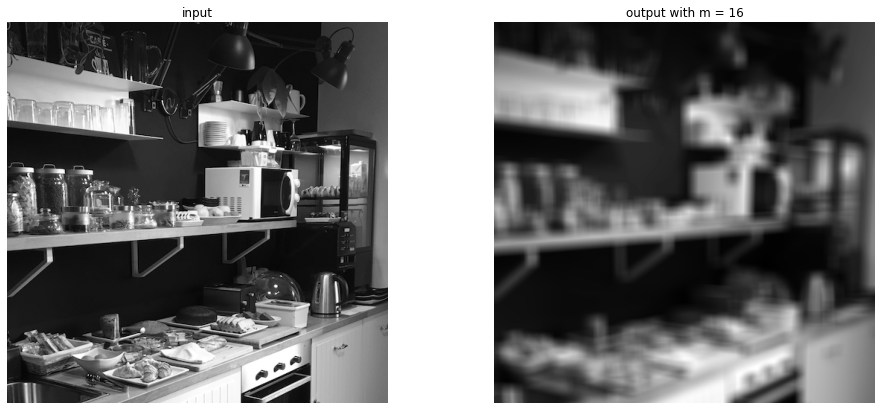

In [4]:
m = n = 16
box = np.ones((m, n), dtype=float) / (m * n)
smooth, process_time = convolution(image, box)
print('The convolution took {:.3f} seconds to compute'.format(process_time))

plt.figure(figsize=(16, 7))
for plot, (img, name) in enumerate(((image, 'input'),
                                    (smooth, 'output with m = {}'.format(m)))): 
    plt.subplot(1, 2, plot + 1)
    show_image(img, name)
plt.show()

In [5]:
def largest_difference(i, j):
    return np.amax(np.abs(i.astype(int) - j.astype(int)))

### Problem 2.1

In [7]:
@add_timer
def python_convolution(f, h):
    '''
    Instructions for 'valid' convolution
    '''

    assert f.ndim == 2, 'input array must be two-dimensional'
    assert h.ndim == 2, 'kernel must be two-dimensional' 

    #get input matrices' data
    f_rows, f_cols = len(f), len(f[0])
    h_rows, h_cols = len(h), len(h[0])

    #figure out the "midpoint" indices for h in order to traverse across f

    

    #generate output matrix
    output_rows, output_cols = f_rows - h_rows + 1, f_cols - h_cols + 1
    output_matrix = np.zeros(shape = (output_rows, output_cols))

    for r in range(output_rows):
        for c in range(output_cols):        
            for h_row in range(h_rows):
                for h_col in range(h_cols):
                    output_matrix[r, c] = output_matrix[r, c] + h[h_rows - (h_row + 1), h_cols - (h_col + 1)] * f[r + h_row, c + h_col]
    

    return output_matrix

In [10]:
# DELETE THIS BEFORE SUBMITTING
I = np.array(
    [
        [1,  0,  3, -2,  0],
        [0,  2, -1,  4,  0],
        [0,  1,  0,  1,  0],
        [2, -2,  0,  1, -1]
    ])
H = np.array(
    [
        [2,  0, 1],
        [1, -1, 3]
    ])
J = np.array(
    [
        [4,  0],
        [1, -5]
    ])
K = np.array(
    [[1, 0, -1]])

In [12]:
# DELETE THIS BEFORE SUBMITTING
a = python_convolution(I, K)
print(a)

(array([[ 2., -2., -3.],
       [-1.,  2.,  1.],
       [ 0.,  0.,  0.],
       [-2.,  3., -1.]]), 9.489999956713291e-05)


### Problem 2.2

In [ ]:
@add_timer
def separable_convolution(f, h, mode = "valid"): 
    m_by_one, one_by_n = h
    
    convolution_intermediate = ss.convolve(
        f,
        m_by_one,
        mode)
    
    convolution_final = ss.convolve(
        convolution_intermediate,
        one_by_n,
        mode)
    
    return convolution_final


In [ ]:
round_val = 3
m = [2**i for i in range(1,7)]

data = {
    'm': [],
    'pyconv_times': [],
    'spconv_times': [],
    'differences': []
}
for m_val in m:
    
    box_filter_m_by_one = np.ones((m_val, 1), dtype = float) / m_val
    box_filter_one_by_n = np.ones((1, m_val), dtype = float) / m_val
    box_filter = box_filter_m_by_one * box_filter_one_by_n
    
    pyconv_image, pyconv_time = python_convolution(image, box_filter)
    spconv_image, spconv_time = separable_convolution(image, (box_filter_m_by_one, box_filter_one_by_n))
    largest_diff = largest_difference(pyconv_image, spconv_image)
    
    data['m'].append(m_val)
    data['pyconv_times'].append(round(pyconv_time, round_val))
    data['spconv_times'].append(round(spconv_time, round_val))
    data['differences'].append(round(largest_diff, round_val))



In [ ]:
from tabulate import tabulate
print(tabulate(data, headers = 'keys', tablefmt = "github")) 

### Problem 2.3

In [ ]:
import skimage.transform.integral as integral


def integral_image(f):
    return np.pad(integral.integral_image(f), ((1, 0), (1, 0)))

In [ ]:
@add_timer                      # something's wrong down here
def box_convolution(f, size):
    F = integral_image(f)
    m, n = size
    F_s = F[m:, n:] # just outside of the mxn box
    F_q = F[:m, n:] # just after the nth column, always inside the mth row 
    F_r = F[m:, :n] # just under the mth row, always inside the nth column 
    F_p = F[:m, :n] # always inside the mxn box
    -F_r + F_p
    return convolution

In [ ]:
report_table = {
    'time' : {
        'convolution' : None,
        'separable_convolution' : None,
        'box_convolution' : None,
    },
    'speedup_factors' : {
        'convolution-separable_convolution' : None,
        'convolution-box_convolution' : None,
        'separable_convolution-box_convolution' : None,
    },
    'largest_difference' : {
        'convolution-separable_convolution': None,
        'convolution-box_convolution': None,
    }
}

In [ ]:
m, n = 32, 64
box_filter = np.ones(shape = (m, n), dtype = float)/(m*n)

#image_pc, report_table['time']['convolution'] = python_convolution(image, box_filter)
#image_sc, report_table['time']['separable_convolution'] = separable_convolution(image, box_filter)
image_bc, report_table['time']['box_convolution'] = box_convolution(image, (m, n))

In [ ]:
report_table['speedup_factors']['convolution-separable_convolution'] = report_table['time']['convolution']/report_table['time']['separable_convolution']
report_table['speedup_factors']['convolution-box_convolution'] = report_table['time']['convolution']/report_table['time']['box_convolution']
report_table['speedup_factors']['separable_convolution-box_convolution'] = report_table['time']['separable_convolution']/report_table['time']['box_convolution']

report_table['largest_difference']['convolution-separable_convolution'] = largest_difference(image_pc, image_sc)
report_table['largest_difference']['convolution-box_convolution'] = largest_difference(image_pc, image_bc)

In [ ]:
print(tabulate(report_table['time'], headers = 'keys'))
print(tabulate(report_table['speedup_factors'], headers = 'keys'))
print(tabulate(report_table['largest_difference'], headers = 'keys'))

### Problem 2.4